# 🚗 **Welcome to the <font color='crimson'>** **Explorer Transportation Data Science Project! 🚗**</font>
 Hosted by the [Northeast Big Data Innovation Hub](https://nebigdatahub.org/about) & [National Student Data Corps](https://nebigdatahub.org/nsdc), in collaboration with the [U.S. Department of Transportation Federal Highway Administration](https://highways.dot.gov/).


---



## <font color='crimson'>**Project Information and Background:**</font>

**Project Description:**

The TDSP provides an opportunity to gain practical experience with data science by creating data-driven recommendations to make roads safer for all. The dataset is Motor Vehicle Collisions crash table where
each row represents a crash event from all police reported motor vehicle collisions
in NYC.

Skills to Gain: Data Cleaning, Python Programming, Time Series Analysis, Geospatial Analysis, Data Visualization, and Critical Thinking Skills

To learn more about this project, including key highlights, incentives, and important links, [review the TDSP Webpage here](https://nebigdatahub.org/nsdc/tdsp/)!

## <font color='crimson'>**Milestone #1 - Data Preparation**</font>
GOAL: The main goal of this milestone is to set up your environment, install the required packages, learn how to access data and do some basic exploratory data analysis.
  

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import folium

In [17]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Next, we will read the data using the `pd.read_csv` function.
Ensure that you've downloaded the dataset from NYC OpenData, and uploaded the dataset to your Google Drive.



In [18]:
# Read the data using pandas read_csv function
data = pd.read_csv("/content/drive/MyDrive/Motor_Vehicle_Collisions_-_Crashes_20241015.csv")

/tmp/ipython-input-3611710422.py:2: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv("/content/drive/MyDrive/Motor_Vehicle_Collisions_-_Crashes_20241015.csv")


**Step 3:** Let's see what the data looks like. We can use the `head` function which returns the first 5 rows of the dataset.

In [19]:
# Print the first 5 rows of the data using head function of pandas
data.head()

,CRASH DATE,CRASH TIME,BOROUGH,ZIP CODE,LATITUDE,LONGITUDE,LOCATION,ON STREET NAME,CROSS STREET NAME,OFF STREET NAME,...,CONTRIBUTING FACTOR VEHICLE 2,CONTRIBUTING FACTOR VEHICLE 3,CONTRIBUTING FACTOR VEHICLE 4,CONTRIBUTING FACTOR VEHICLE 5,COLLISION_ID,VEHICLE TYPE CODE 1,VEHICLE TYPE CODE 2,VEHICLE TYPE CODE 3,VEHICLE TYPE CODE 4,VEHICLE TYPE CODE 5
0,09/11/2021,2:39,NaN,NaN,NaN,NaN,NaN,WHITESTONE EXPRESSWAY,20 AVENUE,NaN,...,Unspecified,NaN,NaN,NaN,4455765,Sedan,Sedan,NaN,NaN,NaN
1,03/26/2022,11:45,NaN,NaN,NaN,NaN,NaN,QUEENSBORO BRIDGE UPPER,NaN,NaN,...,NaN,NaN,NaN,NaN,4513547,Sedan,NaN,NaN,NaN,NaN
2,06/29/2022,6:55,NaN,NaN,NaN,NaN,NaN,THROGS NECK BRIDGE,NaN,NaN,...,Unspecified,NaN,NaN,NaN,4541903,Sedan,Pick-up Truck,NaN,NaN,NaN
3,09/11/2021,9:35,BROOKLYN,11208.0,40.667202,-73.866500,"(40.667202, -73.8665)",NaN,NaN,1211 LORING AVENUE,...,NaN,NaN,NaN,NaN,4456314,Sedan,NaN,NaN,NaN,NaN
4,12/14/2021,8:13,BROOKLYN,11233.0,40.683304,-73.917274,"(40.683304, -73.917274)",SARATOGA AVENUE,DECATUR STREET,NaN,...,NaN,NaN,NaN,NaN,4486609,NaN,NaN,NaN,NaN,NaN


In [20]:
# Describe the data using the describe function of pandas
data.info()
desc_stats = data.describe()
desc_stats

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2126535 entries, 0 to 2126534
Data columns (total 29 columns):
 #   Column                         Dtype  
---  ------                         -----  
 0   CRASH DATE                     object 
 1   CRASH TIME                     object 
 2   BOROUGH                        object 
 3   ZIP CODE                       object 
 4   LATITUDE                       float64
 5   LONGITUDE                      float64
 6   LOCATION                       object 
 7   ON STREET NAME                 object 
 8   CROSS STREET NAME              object 
 9   OFF STREET NAME                object 
 10  NUMBER OF PERSONS INJURED      float64
 11  NUMBER OF PERSONS KILLED       float64
 12  NUMBER OF PEDESTRIANS INJURED  int64  
 13  NUMBER OF PEDESTRIANS KILLED   int64  
 14  NUMBER OF CYCLIST INJURED      int64  
 15  NUMBER OF CYCLIST KILLED       int64  
 16  NUMBER OF MOTORIST INJURED     int64  
 17  NUMBER OF MOTORIST KILLED      int64  
 18  CO

,LATITUDE,LONGITUDE,NUMBER OF PERSONS INJURED,NUMBER OF PERSONS KILLED,NUMBER OF PEDESTRIANS INJURED,NUMBER OF PEDESTRIANS KILLED,NUMBER OF CYCLIST INJURED,NUMBER OF CYCLIST KILLED,NUMBER OF MOTORIST INJURED,NUMBER OF MOTORIST KILLED,COLLISION_ID
count,1.873352e+06,1.873352e+06,2.126517e+06,2.126504e+06,2.126535e+06,2.126535e+06,2.126535e+06,2.126535e+06,2.126535e+06,2.126535e+06,2.126535e+06
mean,4.061987e+01,-7.373786e+01,3.169225e-01,1.528800e-03,5.741170e-02,7.542787e-04,2.770657e-02,1.194431e-04,2.277212e-01,6.315438e-04,3.197550e+06
std,2.058796e+00,3.858424e+00,7.062457e-01,4.128220e-02,2.457757e-01,2.803011e-02,1.662318e-01,1.097130e-02,6.674975e-01,2.748256e-02,1.506465e+06
min,0.000000e+00,-2.013600e+02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.200000e+01
25%,4.066767e+01,-7.397478e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,3.167754e+06
50%,4.072065e+01,-7.392713e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,3.699527e+06
75%,4.076963e+01,-7.386673e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,4.231394e+06
max,4.334444e+01,0.000000e+00,4.300000e+01,8.000000e+00,2.700000e+01,6.000000e+00,4.000000e+00,2.000000e+00,4.300000e+01,5.000000e+00,4.763287e+06


Brief:
1. Latitude & Longitude: The latitude and longitude indicate where the crashes are occurring. However, there are some data points with latitude and longitude values of 0, which is likely due to missing or inaccurate data.

2. Number of Persons Injured: On average, each crash has around 0.305 injuries. The maximum number of injuries in a single crash is 43.

3. Number of Persons Killed: Fatalities are rare, with an average of 0.00146 deaths per crash. The maximum number of deaths in one crash is 8.

4. Number of Pedestrians, Cyclists, and Motorists Injured/Killed: These columns provide a breakdown of the injuries and fatalities by type of individual involved.

5. Collision ID: This is a unique identifier for each crash.



---



##<font color='crimson'> **Milestone #2 - Data Ethics, Pre-Processing, and Exploration** </font>
GOAL: The main goal of this milestone is to assess the dataset, find missing values, and decide what to do with those missing data points.

**Step 2:**
Check the dataset for missing values.


In [21]:
# Leverage the isnull() and sum() functions to find the number of missing values in each column
missing_values = data.isnull().sum()
missing_values

# Turn the missing value counts into percentages
missing_values_percentage = (missing_values / len(data)) * 100
missing_values_percentage

# Return counts and percentages of missing values in each column
missing_data = pd.DataFrame({'Missing Values': missing_values, 'Percentage (%)': missing_values_percentage})
missing_data.sort_values(by='Percentage (%)', ascending=False)

,Missing Values,Percentage (%)
VEHICLE TYPE CODE 5,2117381,99.569534
CONTRIBUTING FACTOR VEHICLE 5,2117091,99.555897
VEHICLE TYPE CODE 4,2093062,98.425937
CONTRIBUTING FACTOR VEHICLE 4,2091824,98.367720
VEHICLE TYPE CODE 3,1979378,93.079963
CONTRIBUTING FACTOR VEHICLE 3,1973659,92.811028
OFF STREET NAME,1763589,82.932517
CROSS STREET NAME,810413,38.109554
ZIP CODE,661597,31.111503
BOROUGH,661337,31.099277


Here's an overview of the missing values in the dataset:

Columns like VEHICLE TYPE CODE 5, CONTRIBUTING FACTOR VEHICLE 5, VEHICLE TYPE CODE 4, and so on have a high percentage of missing values. This is expected since not all crashes involve multiple vehicles or factors.

OFF STREET NAME and CROSS STREET NAME have significant missing values. This could be due to crashes occurring in locations where these details aren't applicable or weren't recorded.

ZIP CODE, BOROUGH, and ON STREET NAME also have missing values. This might be due to incomplete data entry or crashes occurring in areas where these specifics aren't easily determinable.

LOCATION, LATITUDE, and LONGITUDE have the same count of missing values, indicating that when one is missing, the others are likely missing as well.

**Step 3:** Create a bar chart to display the top 10 contributing factors (e.g. backing up unsafely, unsafe lane changing, etc.) to crashes within the dataset.

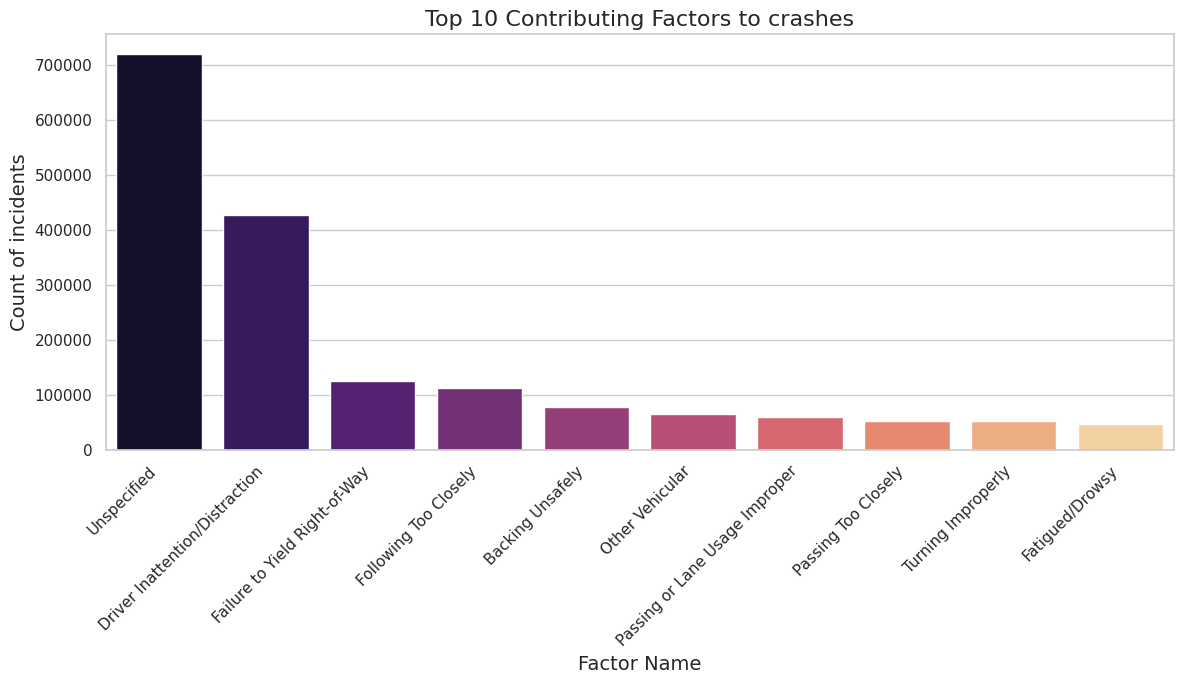

In [22]:
# Plot a Bar Chart

top_factors = data['CONTRIBUTING FACTOR VEHICLE 1'].value_counts().head(10)


plt.figure(figsize=(12, 7))
# TODO: Plotting the top contributing factors, fill in x as the index field of the variable 'top_factors'
sns.barplot(x=top_factors.index, y=top_factors.values, hue=top_factors.index, palette='magma')
plt.title('Top 10 Contributing Factors to crashes', fontsize=16)
plt.xlabel('Factor Name', fontsize=14)
plt.ylabel('Count of incidents', fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


Besides for "Unspecified," what are the top 3 contributing factors that cause the most crashes?

> *  Driver Inattention/Distraction
> *  Failure to Yield Right-of-Way
> *  Following Too Closely

**Step 4:** Now, let's create another bar chart to determine which vehicle types were involved in the most crashes.

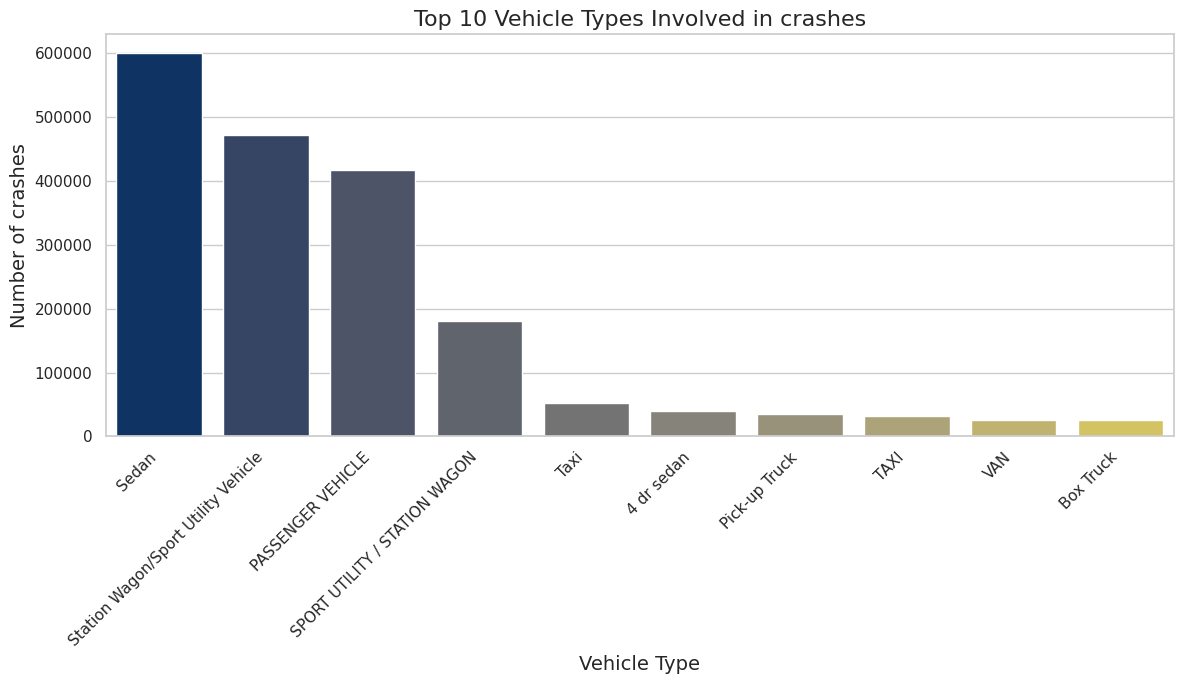

In [23]:
# Determine the top vehicle types involved in crashes
top_vehicle_types = data['VEHICLE TYPE CODE 1'].value_counts().head(10)

# Plotting the top vehicle types
plt.figure(figsize=(12, 7))
sns.barplot(x=top_vehicle_types.index, y=top_vehicle_types.values, hue=top_vehicle_types.index, palette="cividis")
plt.title('Top 10 Vehicle Types Involved in crashes', fontsize=16)
plt.xlabel('Vehicle Type', fontsize=14)
plt.ylabel('Number of crashes', fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


What are the top 3 vehicles that were most involved in crashes?


> *   Sedan
> *   Station Wagon/Sport Utility Vehicle
> *   PASSENGER VEHICLE







**Step 5:**  A DataFrame is a two-dimensional and potentially heterogeneous tabular data structure with labeled axes (rows and columns). DataFrames allow for storing, manipulating, and retrieving data in a structured form, serving as the primary data structure for a multitude of data processing tasks. It is used with Python libraries like pandas.

Let's graph the *types* of crashes within this dataset and their frequencies. Begin by aggregating your data, convert to [DataFrame](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.html) for simple plotting, and plot.



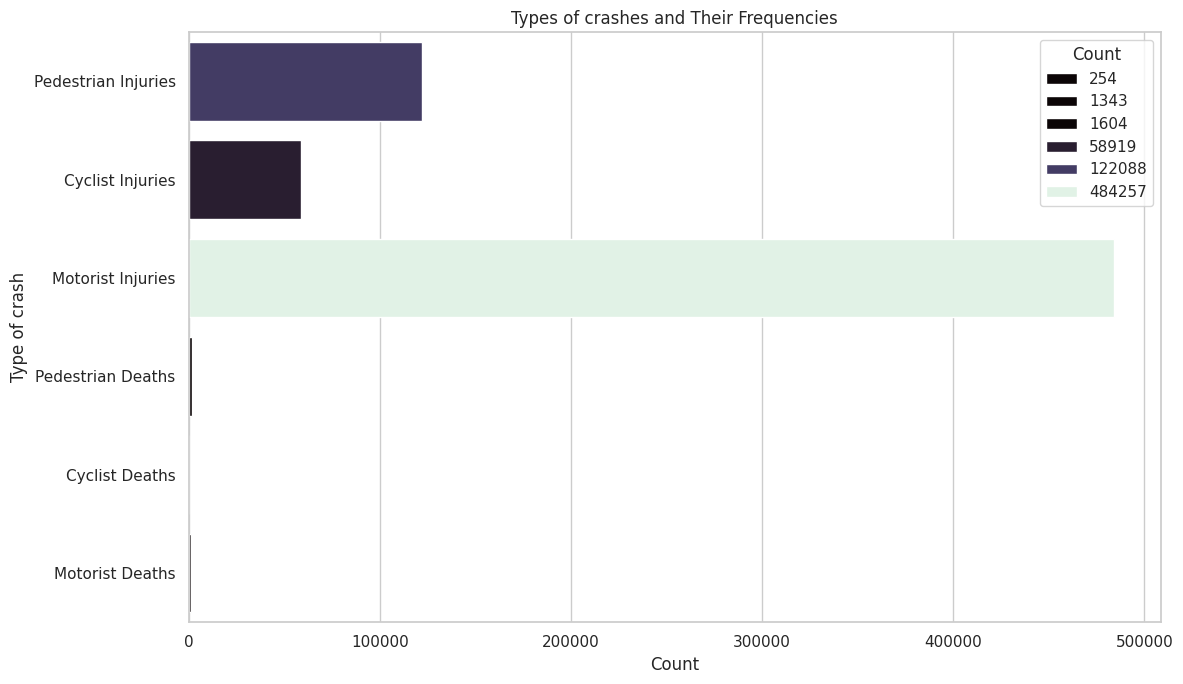

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns

# Aggregating data - Complete for Cyclist and Motorist
types_of_crashes = {
    'Pedestrian Injuries': data['NUMBER OF PEDESTRIANS INJURED'].sum(),
    'Cyclist Injuries': data['NUMBER OF CYCLIST INJURED'].sum(),
    'Motorist Injuries': data['NUMBER OF MOTORIST INJURED'].sum(),
    'Pedestrian Deaths': data['NUMBER OF PEDESTRIANS KILLED'].sum(),
    'Cyclist Deaths': data['NUMBER OF CYCLIST KILLED'].sum(),
    'Motorist Deaths': data['NUMBER OF MOTORIST KILLED'].sum()
}

types_of_crashes

# Converting to DataFrame for easier plotting - we want the items in the dictionary, use the items function
crash_types_df = pd.DataFrame(list(types_of_crashes.items()), columns=['crash Type', 'Count'])

# Plot
plt.figure(figsize=(12, 7))
sns.barplot(x='Count', y='crash Type', data=crash_types_df, hue='Count', palette="mako")
plt.title('Types of crashes and Their Frequencies')
plt.xlabel('Count')
plt.ylabel('Type of crash')
plt.tight_layout()
plt.show()


---

##<font color='crimson'> **Milestone #3 - Time Series Analysis**</font>
GOAL: The main goal of this milestone is to dive deeper into Time Series Analysis in order to better understand our data's trends over time.

**Step 1**: Let's begin by creating a chart that displays the average number of crashes per hour of the day. This will help us understand whether additional factors are contributing to crashes - i.e. rush hour, school dismissal time, night fall, etc.

/tmp/ipython-input-1972896024.py:7: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(file_path)


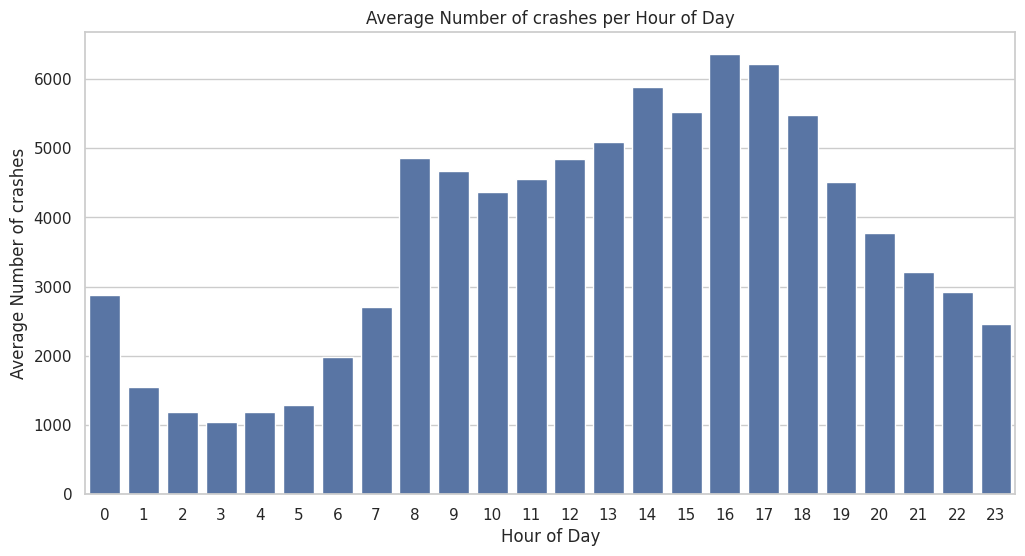

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Load the dataset
file_path = "/content/drive/MyDrive/Motor_Vehicle_Collisions_-_Crashes_20241015.csv"
data = pd.read_csv(file_path)

# Convert 'CRASH DATE' and 'CRASH TIME' to datetime
data['CRASH DATE'] = pd.to_datetime(data['CRASH DATE'])
data['CRASH TIME'] = pd.to_datetime(data['CRASH TIME'], format='%H:%M')

# Time of Day Analysis
data['Hour of Day'] = data['CRASH TIME'].dt.hour

# Group by 'Hour of Day' and calculate the average number of crashes per hour
average_crashes_per_hour = data.groupby('Hour of Day').size() / data['Hour of Day'].nunique()
average_crashes_per_hour.index

# Plot the average number of crashes
plt.figure(figsize=(12, 6))
sns.barplot(x=average_crashes_per_hour.index, y=average_crashes_per_hour.values)
plt.title('Average Number of crashes per Hour of Day')
plt.xlabel('Hour of Day')
plt.ylabel('Average Number of crashes')
plt.xticks(range(0, 24))
plt.show()




Which time of the day sees the most crashes? Why do you think so?

> *  The data indicates that the highest number of crashes occur between 4 PM and 5 PM. This aligns with peak rush hour, as many people are leaving work and commuting home during this time. There is also a peak at 8 AM. Which is again a time when people are leaving for work in the morning.


**Step 2**: Plot a graph to determine how COVID-19 impacted the number of crashes per month, if at all.


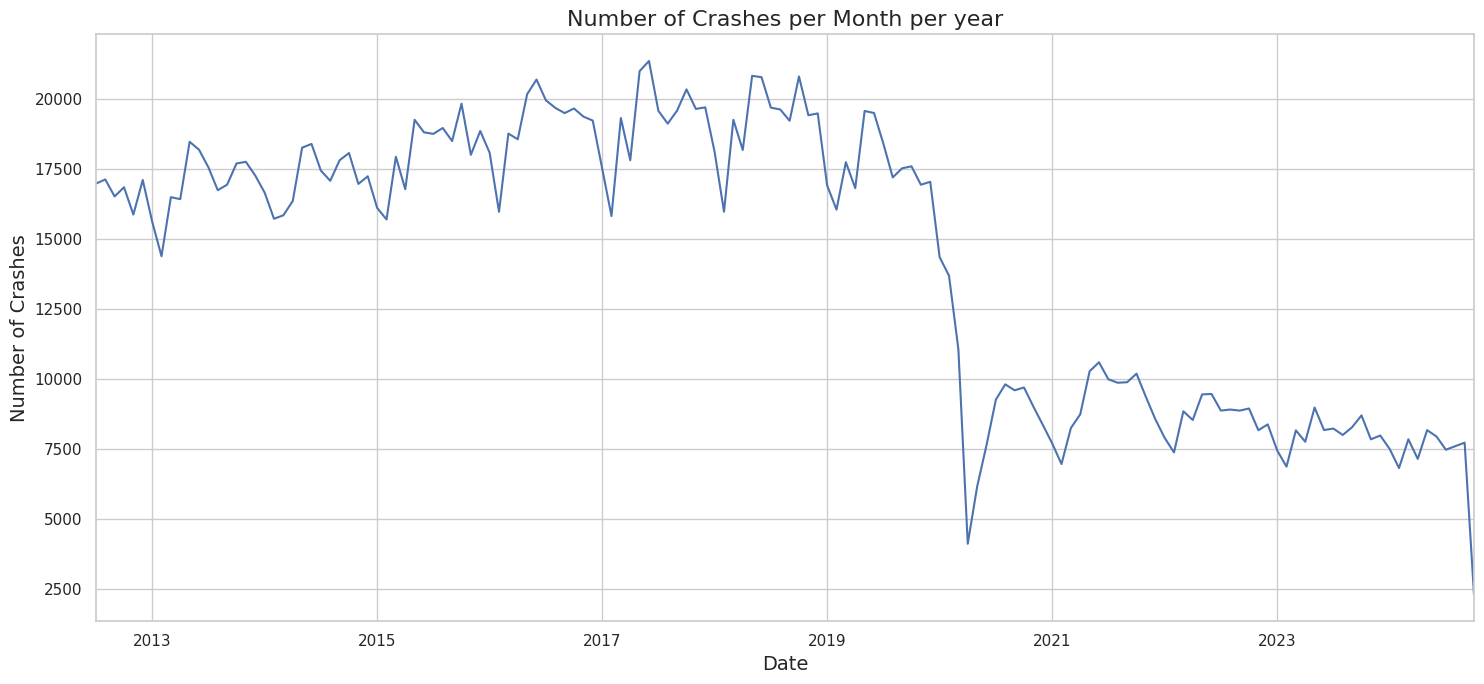

In [26]:
# Convert 'CRASH DATE' to datetime format
data['CRASH DATE'] = pd.to_datetime(data['CRASH DATE'])

# When you use to_period('M'), it automatically includes both the month and the year in each period.
# to_period('M') Conversion: When you apply .dt.to_period('M') on a datetime column, it converts each date to a "year-month" period,
#such as 2024-01, 2024-02, etc. This means eachv unique month of each year becomes its own unique period, and they are treated as separate groups.

# Group by month and year to get the number of crashes per month
monthly_crashes = data.groupby(data['CRASH DATE'].dt.to_period("M")).size()

# Plotting the trend over time
plt.figure(figsize=(15, 7))
monthly_crashes.plot()
plt.title('Number of Crashes per Month per year', fontsize=16)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Number of Crashes', fontsize=14)
plt.tight_layout()
plt.show()

What does your graph tell you about the impact of COVID-19 on the number of crashes per month? Why do you think this occurred?

> *  The trendline shows us significant change in crashes in mid 2020, a sharp decline. This is interesting as restrictions in the US due to COVID-19 were issues in March 2020 when a community within New Rochelle, New York, was declared to be a “containment area.” Once 2023 rolled it we can see that there is still not a rise back to that of 2019 because most of the work continued to be hybrid, leading to a decline in travel for short and long distance.



**Step 3**: Apply time series decomposition to review trends, seasonality, and residuals. New to time series analysis? Review the [Time Series Flashcard video series](https://youtube.com/playlist?list=PLNs9ZO9jGtUAqd0CNKySksPJJaOqYPMvk&feature=shared) here to learn about trends, components, and further analysis!

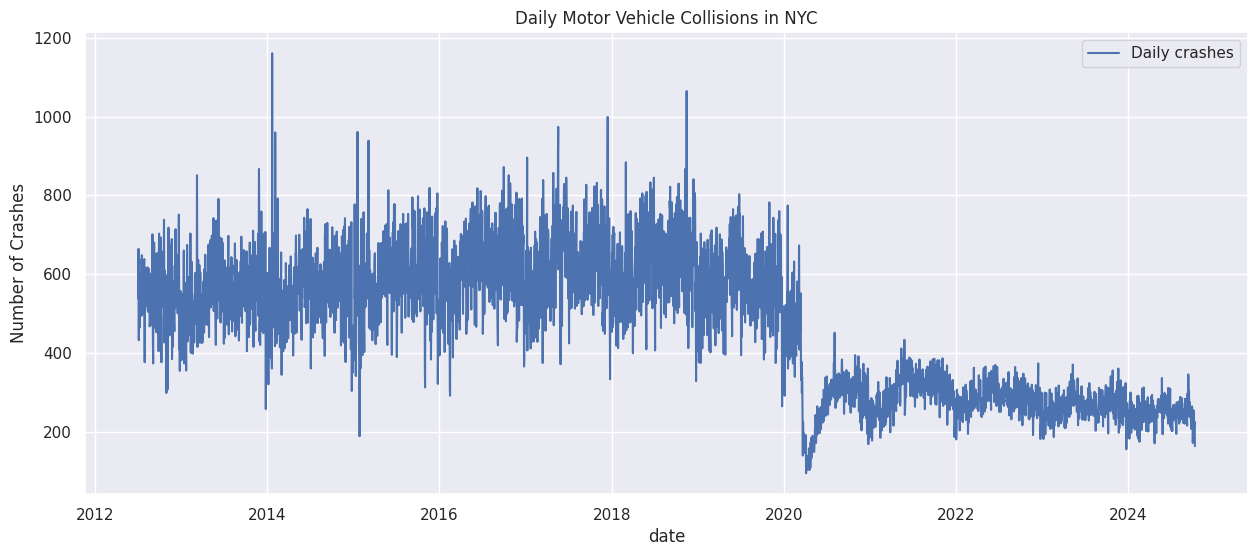

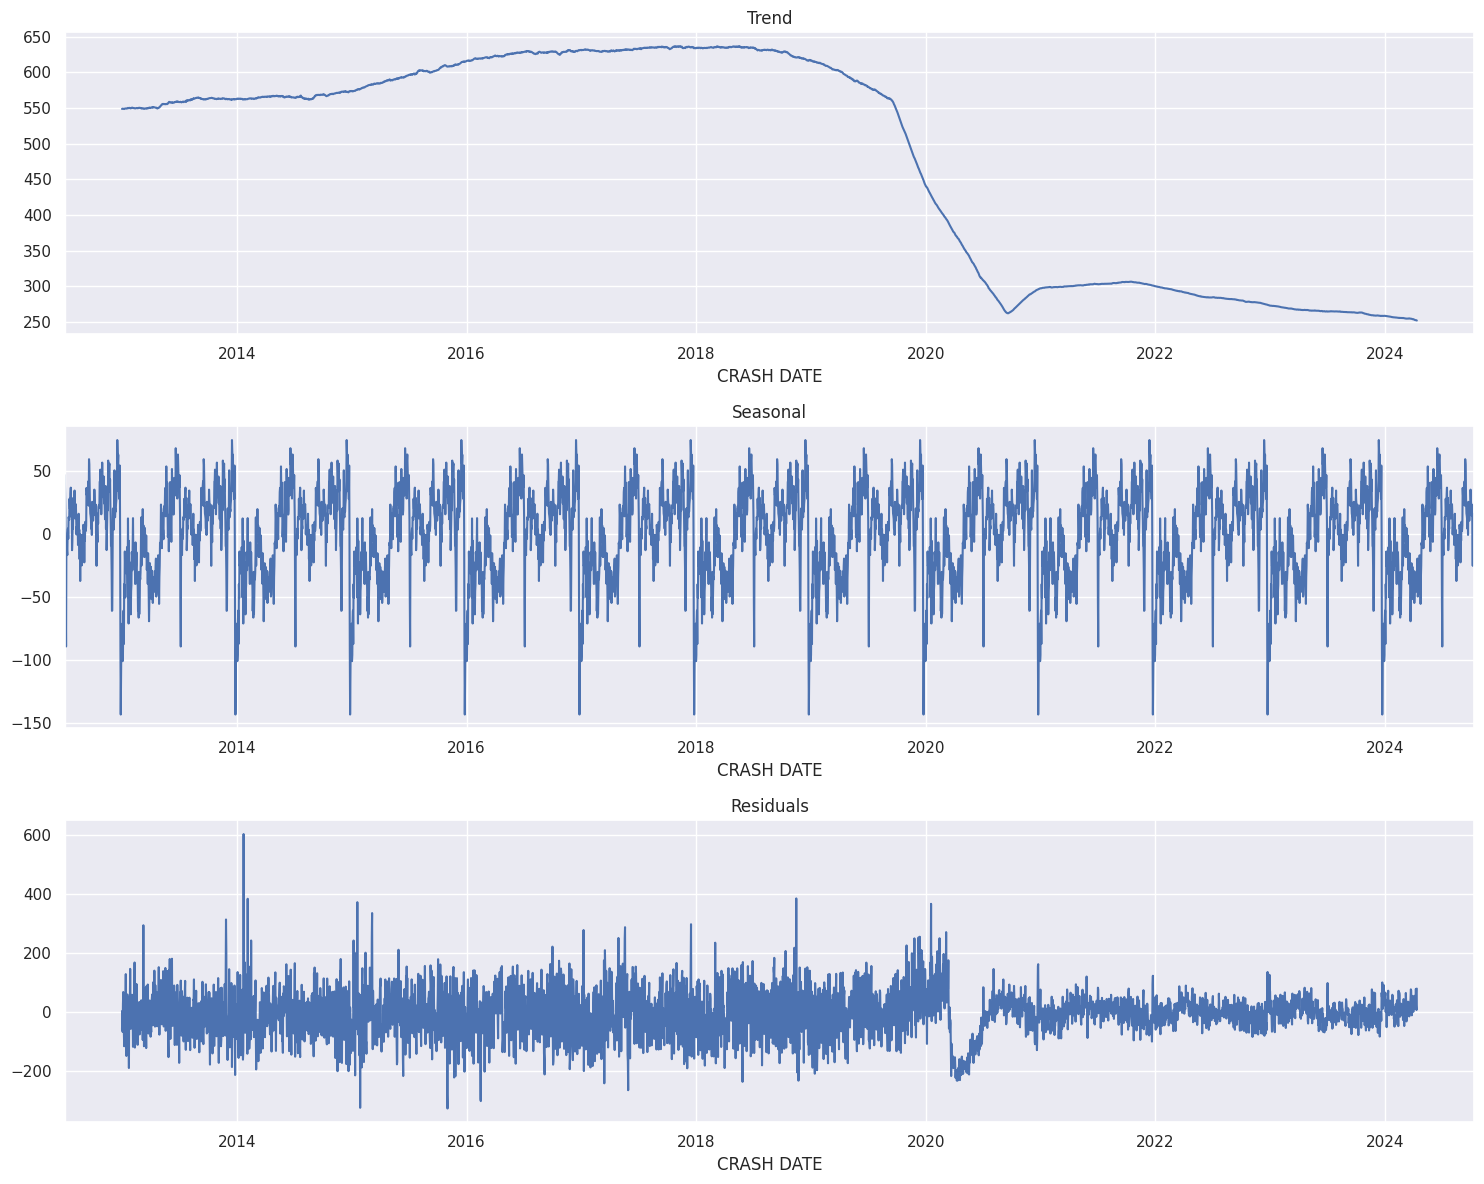

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose

# Count the number of crashes per day, group by CRASH DATE
daily_crashes = data.groupby(data['CRASH DATE']).size()

# Set plot style
sns.set(style="darkgrid")

# Plot the daily crashes time series
plt.figure(figsize=(15, 6))
plt.plot(daily_crashes, label='Daily crashes')
plt.title('Daily Motor Vehicle Collisions in NYC')
plt.xlabel('date')
plt.ylabel('Number of Crashes')
plt.legend()
plt.show()

# Decompose the time series
decomposition = seasonal_decompose(daily_crashes, model='additive', period=365)

# Plot the decomposed components
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(15, 12))
decomposition.trend.plot(ax=ax1)
ax1.set_title('Trend')
decomposition.seasonal.plot(ax=ax2)
ax2.set_title('Seasonal')
decomposition.resid.plot(ax=ax3)
ax3.set_title('Residuals')
plt.tight_layout()
plt.show()

The visualizations above provide valuable insights into the time series of daily motor vehicle collisions in New York City:

1. Time Series Plot: This shows the number of daily crashes over time. You might observe long-term trends, seasonal patterns, or significant outliers.

2. Decomposed Components:
  
    2.1 Trend: This graph shows the long-term trend in the data, which can indicate whether crashes are increasing, decreasing, or stable over time.

    2.2 Seasonality: This reveals any regular patterns that repeat over a specific period, such as yearly. It helps identify times of the year with higher or lower crash frequencies.

    2.3 Residuals: These are the irregular components that cannot be attributed to the trend or seasonality. They might include random or unpredictable fluctuations.

---

##<font color='crimson'>**Milestone #4 - Geospatial Analysis**</font>
GOAL: The main goal of this milestone is to explore geospatial aspects of the dataset and get comfortable with regional analysis and geospatial visualizations.

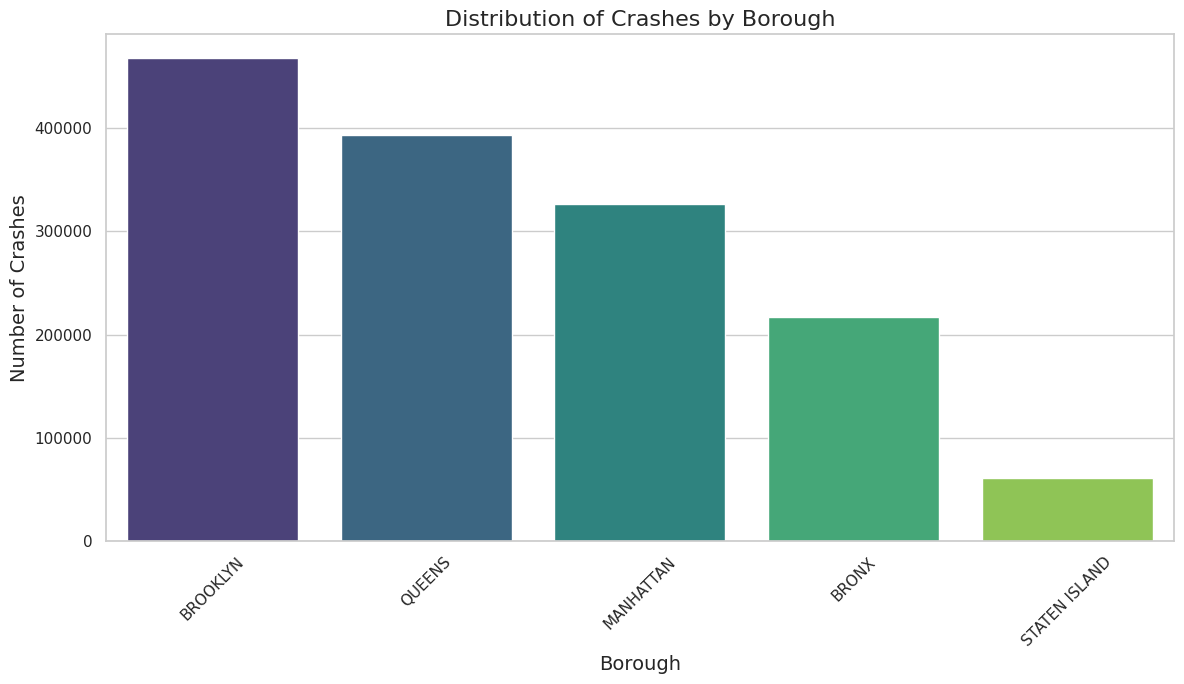

In [28]:
# Plot a bar chart to compare the number of crashes that occurred in each of the five boroughs.
# Set style
sns.set_style("whitegrid")

# Plotting the distribution of crashes by borough
plt.figure(figsize=(12, 7))
# Find the count of unique values of BOROUGHS. Hint: Use value_count function.
borough_count = data['BOROUGH'].value_counts()
sns.barplot(x=borough_count.index, y=borough_count.values, hue=borough_count.index, palette="viridis")
plt.title('Distribution of Crashes by Borough', fontsize=16)
plt.xlabel('Borough', fontsize=14)
plt.ylabel('Number of Crashes', fontsize=14)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Which borough has the highest number of crashes? Which borough has the lowest?

> * Highest: Brooklyn
> * Lowest: Staten Island


 Heatmaps are graphical representations that use color coding to represent different values and variables. Let's leverage a heatmap to determine the most dangerous intersections in the dataset. (**Note: the below cell may take a few minutes to run**)

In [29]:
# Create a heatmap leveraging the latitude and longitude variables to determine where the most crashes are occurring
from folium.plugins import HeatMap

# Drop rows with missing latitude and longitude values
data_geo = data.dropna(subset=['LATITUDE', 'LONGITUDE'])

# Create a base map
m = folium.Map(location=[40.730610, -73.935242], zoom_start=10)  # Centered around NYC

# Create a heatmap
heat_data = [[row['LATITUDE'], row['LONGITUDE']] for index, row in data_geo.iterrows()]
HeatMap(heat_data, radius=8, max_zoom=13).add_to(m)

m.save("Heatmap.html")


---
---
##<font color='crimson'>**Analytical Findings and Conclusion**</font>
The dataset has a lot to offer. Based the analysis that we have done, we can summarize
the findings as below.
1. The maximum crashes occur during peak rush hour of 4 to 5 PM and also there in
an increased number of accidents happening during 8 to 9 AM in the morning. The
count of accidents drastically drop during late hours of the night between 1 to 4 AM
which is expected as the traffic is low.
2. The top reason for accidents is inattention/distraction. This reason is controllable
and if the drivers are more mindful and present, the number of accidents can be
brought down.
3. Among the five boroughs of NYC, Brooklyn sees the highest number of accidents.
But in the heatmap we can also see Manhattan having a hotspot based on location.
These places can use added safety regulation.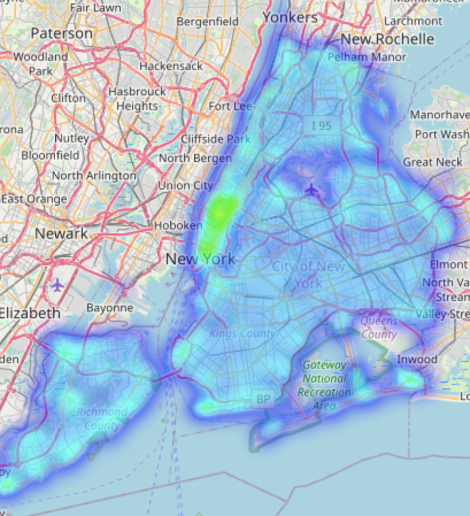
4. We see that larger size vehicles like Sedan, Sports utility van, passenger
vehicle are more prone to accidents. The data is also a little unclean as there
are different entries for “taxi” and “TAXI”. This could use some
standardization when storing information.
5. We can also conclude how restrictions and lockdown during Covid – 19
impacted the trend of incidents. With low movement and remote working, as
the traffic on road decreased, we could see a tremendous drop in the
accidents.
6. In addition to the high number of motorists that occupy the vehicle getting
injured, we see that pedestrians are also very vulnerable and have fatal
injuries. This shows the importance to have road safety regulations in place
to prevent or at least decrease causalities.
